## Business Problem

- This case requires trainees to develop a model for predicting fraudulent transactions for a 
financial company and use insights from the model to develop an actionable plan. Data for the 
case is available in CSV format having 6362620 rows and 10 columns.

- Candidates can use whatever method they wish to develop their machine learning model. 
Following usual model development procedures, the model would be estimated on the 
calibration data and tested on the validation data. This case requires both statistical analysis and 
creativity/judgment. We recommend you spend time on both fine-tuning and interpreting the 
results of your machine learning model.

# Data Dictionary

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

## Reading a File

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Accredian\Fraud.csv')

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.shape

(6362620, 11)

In [4]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [4]:
df_num = df.select_dtypes(exclude='object')

In [9]:
df_num.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [9]:
df['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

### 1. Data cleaning including missing values, outliers and multi-collinearity. 

In [10]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

- There is no null values in the dataset

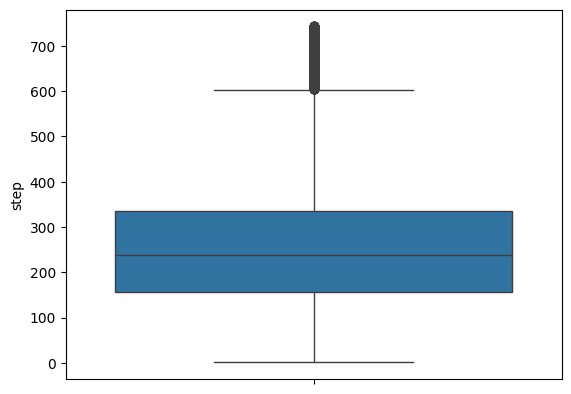

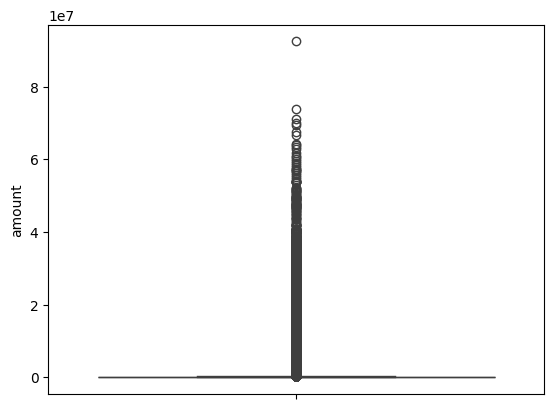

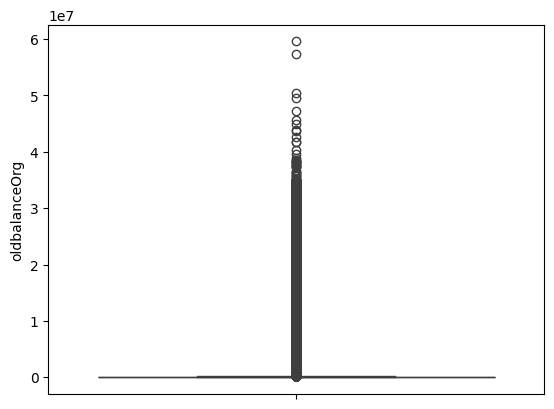

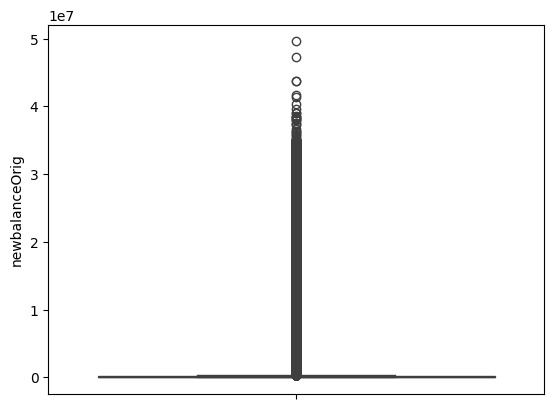

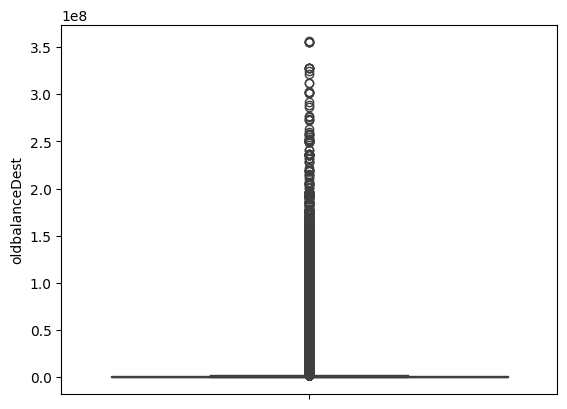

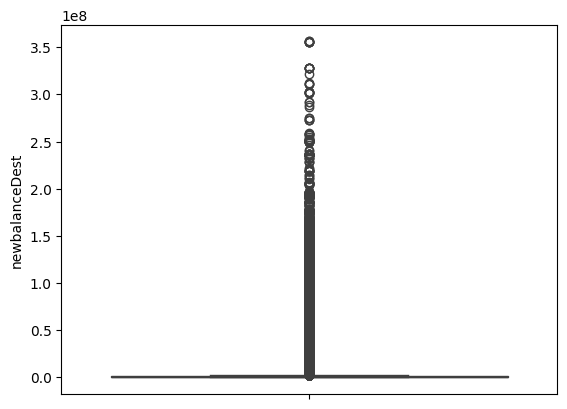

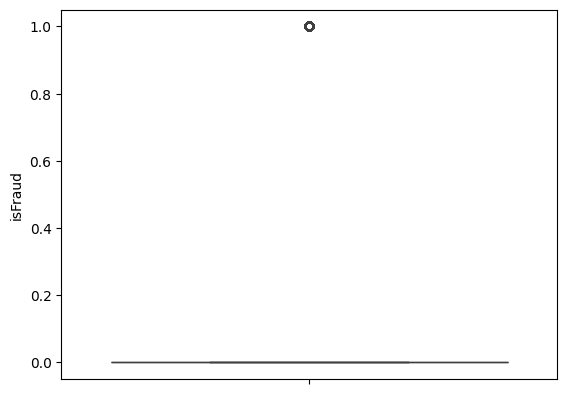

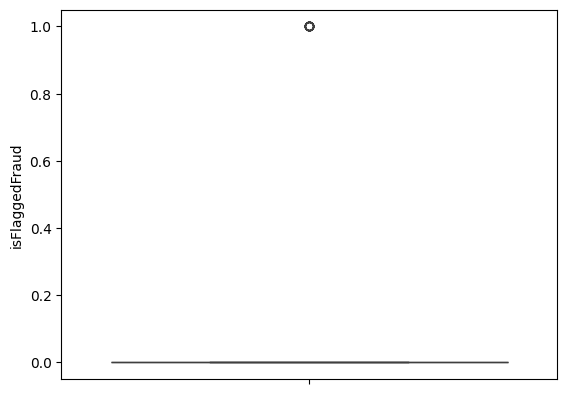

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np


for i in df_num:
    sns.boxplot(df_num[i])
    plt.show()

- we can see the outliers in the dataset

<Axes: >

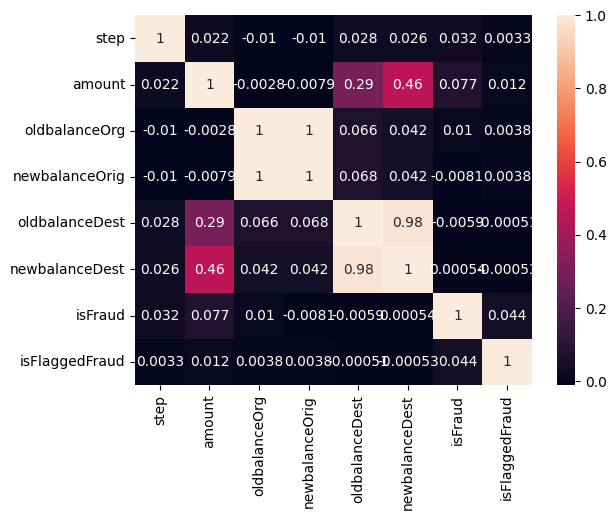

In [12]:
import seaborn as sns

sns.heatmap(df_num.corr(),annot=True)

In [5]:
df[['oldbalanceOrg','newbalanceOrig']].corr()

,oldbalanceOrg,newbalanceOrig
oldbalanceOrg,1.000000,0.998803
newbalanceOrig,0.998803,1.000000


In [6]:
df[['oldbalanceDest','newbalanceDest']].corr()

,oldbalanceDest,newbalanceDest
oldbalanceDest,1.000000,0.976569
newbalanceDest,0.976569,1.000000


- There is corelation between in these four columns 

### 2. Describe your fraud detection model in elaboration. 

## Visualization 

In [13]:
df['step'].value_counts()

step
19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: count, Length: 743, dtype: int64

<Axes: xlabel='type,isFraud'>

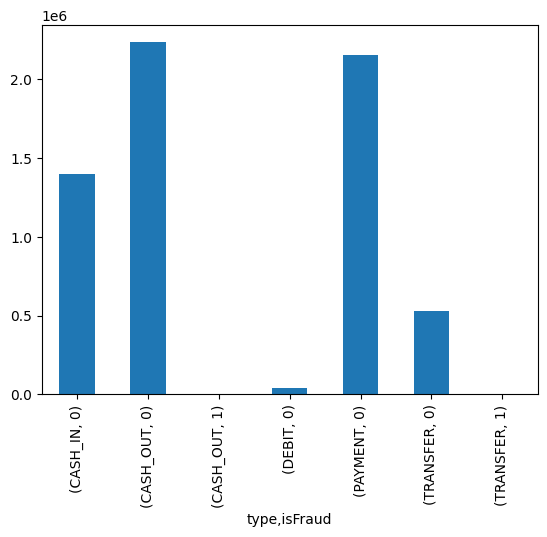

In [6]:
df.groupby('type')['isFraud'].value_counts().plot(kind='bar')

In [6]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [3]:
## dropping the column

df.drop(['nameOrig','nameDest'],axis=1,inplace=True)

- these two columns not give any appropriate information so we drop this columns

## Encoding

In [4]:
df = pd.get_dummies(data=df,columns=['type'],drop_first=True,dtype='int')

In [7]:
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,1,0


##  Outlier treatment

- In this dataset, we do not remove outliers because they are likely to represent fraudulent transactions. Outliers, such as unusually large transaction amounts or sudden changes in account balances, often signal suspicious activity. Since fraud is typically abnormal behavior, these outliers are crucial for identifying patterns of fraud. Removing them could reduce the model's ability to detect fraudulent activity, which is the primary goal of this analysis. Therefore, keeping outliers helps ensure that the model can learn and recognize potential fraud effectively.








## Scaling

In [5]:
from sklearn.preprocessing import StandardScaler

In [19]:
df.columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud', 'type_CASH_OUT',
       'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER'],
      dtype='object')

In [6]:
df_scale = df[['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']]

In [7]:
for i in df_scale:
    std = StandardScaler()
    df[i] = std.fit_transform(df[[i]])

In [8]:
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,-1.703042,-0.281560,-0.229810,-0.237622,-0.323814,-0.333411,0,0,0,0,1,0
1,-1.703042,-0.294767,-0.281359,-0.285812,-0.323814,-0.333411,0,0,0,0,1,0
2,-1.703042,-0.297555,-0.288654,-0.292442,-0.323814,-0.333411,1,0,0,0,0,1
3,-1.703042,-0.297555,-0.288654,-0.292442,-0.317582,-0.333411,1,0,1,0,0,0
4,-1.703042,-0.278532,-0.274329,-0.282221,-0.323814,-0.333411,0,0,0,0,1,0


## Splitting the Dataset

In [9]:
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [10]:
x = df.drop('isFraud',axis=1)
y = df['isFraud']

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.30,random_state=100,stratify=y)

In [11]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(4453834, 11)
(1908786, 11)
(4453834,)
(1908786,)


## Statistical Test

In [ ]:
Ho: mean of train = mean of test
H1 : mean of train != mean of test

In [31]:
import statsmodels.stats.weightstats as weightstats
weightstats.ztest(ytrain,ytest)

(-0.0024094607281700104, 0.9980775303452825)

p_value < 0.05 ...... No .... failed to reject Ho
Mean of train and Mean of test is equal

Thus we can say that Both Train and Test represent the overall dataset statistically.

## Model Building

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

### LogisticRegression

In [13]:
LG_model = LogisticRegression()
LG_model.fit(xtrain,ytrain)
train_pred = LG_model.predict(xtrain)
test_pred = LG_model.predict(xtest)


In [14]:
print('Training report',classification_report(ytrain,train_pred))
print('Testing report',classification_report(ytest,test_pred))

Training report               precision    recall  f1-score   support

           0       1.00      1.00      1.00   4448085
           1       0.93      0.43      0.59      5749

    accuracy                           1.00   4453834
   macro avg       0.96      0.72      0.80   4453834
weighted avg       1.00      1.00      1.00   4453834

Testing report               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.93      0.42      0.57      2464

    accuracy                           1.00   1908786
   macro avg       0.96      0.71      0.79   1908786
weighted avg       1.00      1.00      1.00   1908786



In [19]:
import numpy as np

importances = LG_model.coef_[0] 
feature_importances = pd.DataFrame({'Feature': xtrain.columns, 'Importance': np.abs(importances)})
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)
print(feature_importances)


           Feature  Importance
3   newbalanceOrig   36.737499
2    oldbalanceOrg   33.982562
5   newbalanceDest   13.235984
4   oldbalanceDest   11.279052
6   isFlaggedFraud    8.949364
10   type_TRANSFER    5.912989
7    type_CASH_OUT    4.320059
9     type_PAYMENT    2.884028
1           amount    1.079763
0             step    0.721238
8       type_DEBIT    0.338513


### 3. How did you select variables to be included in the model?¶

- The variables included in the model were chosen based on their potential relevance to fraud detection:

- Domain Knowledge:
- Transaction Type (type): 
Certain transaction types, like Transfer and Cash-Out, are more likely to be associated with fraud. Based on business context, these were crucial in detecting fraudulent patterns.
- Amount: Fraudsters often transfer or cash out unusually large amounts, making the transaction amount a key feature.
- Old and New Balances (oldbalanceOrg, newbalanceOrg, oldbalanceDest, newbalanceDest): Sudden changes in balance, especially when funds are quickly transferred out of an account, can indicate fraudulent activity. These variables were important for capturing such behaviors.

- Final Variables Used:

The final model included variables like step, type, amount, oldbalanceOrg, newbalanceOrg, oldbalanceDest, and newbalanceDest as they showed strong potential for detecting fraudulent behavior.

This approach ensures that the model learns from the most relevant features while remaining computationally efficient for fraud detection in real-world scenarios.



### 4. Demonstrate the performance of the model by using best set of tools.

## Cross-Validation

In [15]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation with 5 folds
scores = cross_val_score(LG_model, x, y, cv=5, scoring='accuracy')

# Output the individual scores and their mean
print("Cross-validation accuracy scores:", scores)
print("Mean accuracy:", scores.mean())


Cross-validation accuracy scores: [0.99901691 0.99919844 0.99925267 0.99927388 0.99909943]
Mean accuracy: 0.9991682671603836


- Cross-validation is a key technique used to evaluate how a model generalizes to unseen data by training it on different subsets (or "folds") of the data and testing it on the remaining parts. When applied to a logistic regression model, cross-validation helps assess the model's performance across different portions of the dataset, ensuring that the evaluation is not biased by a particular train-test split.

- Why Cross-Validation?
Avoiding Overfitting: Instead of training and testing the model on a single split of the data, cross-validation reduces the risk of overfitting, especially when working with small datasets.

- Better Generalization: By averaging performance across several folds, cross-validation gives a better idea of how well the model will perform on unseen data.

### 5. What are the key factors that predict fraudulent customers?

Key factors that predict fraudulent transactions can vary based on the dataset and the model's results, but some common factors that are often important in detecting fraud include:

- Transaction Type: Fraudulent activities are commonly linked to certain types of transactions like TRANSFER and CASH_OUT. These types often involve moving money out of an account quickly, which fraudsters use to avoid detection.

- Transaction Amount: Very large or unusual transaction amounts, especially when compared to the customer’s previous transactions, can be a strong indicator of fraud.

- Old and New Balance (Sender): A significant difference between the sender's oldbalanceOrg (before transaction) and newbalanceOrg (after transaction), especially when the new balance becomes zero or close to zero after a large transaction, might signal fraud.

- Old and New Balance (Recipient): Large changes in the recipient’s balances (oldbalanceDest and newbalanceDest) could also be signs of fraudulent transfers.

- IsFlaggedFraud: If a transaction is flagged for exceeding a threshold, such as a transfer over 200,000, it increases the likelihood that the transaction is fraudulent.

- Step (Time): Fraudulent transactions might follow certain patterns within specific time periods or during unusual hours (e.g., night-time, weekends).

### 6.Do these factors make sense? If yes, how? If not, how not?

Yes, these factors make sense in the context of fraud detection:

- Transaction Type: Fraudulent transactions often involve moving money out of the system quickly (via TRANSFER or CASH_OUT), which is a typical fraud behavior.

- Transaction Amount: Sudden large transactions are suspicious because fraudsters aim to extract as much money as possible in a short time before detection.

- Balance Changes: A pattern where the sender’s balance drops significantly and the recipient’s balance increases is typical in fraud, as the fraudster usually empties an account and transfers the funds to another account under their control.

- Flagged Transactions: Fraud detection systems often set thresholds for unusual activity (e.g., transactions over a certain amount), so a flagged transaction is a strong indicator of possible fraud.

- Time (Step): Fraudsters may operate at unusual hours to avoid detection by the victim or banking staff, so time patterns are relevant.

These factors make sense as they align with typical fraudster behavior patterns in financial fraud schemes.

### 7. What kind of prevention should be adopted while the company updates its infrastructure?

To prevent fraud, the company should implement a range of security measures, such as:

- Real-Time Transaction Monitoring: Use machine learning models to flag suspicious transactions in real-time based on the factors mentioned earlier (e.g., large transactions, unusual account behavior, flagged transfers).

- Multi-Factor Authentication (MFA): Enforce stronger authentication protocols, especially for high-value or risky transactions, such as large transfers or international payments.

- Transaction Limits and Alerts: Set tighter limits on transactions, especially for new or inactive accounts. Send real-time alerts to customers for suspicious activities.

- Fraud Prevention Algorithms: Continuously train and update fraud detection models using fresh data, incorporating new patterns of fraud as they emerge.

### 8. Assuming these actions have been implemented, how would you determine if they work?

To determine the effectiveness of the implemented actions, the company can track several key metrics and performance indicators:

- Fraud Incident Rate: Monitor the number of fraudulent transactions detected before and after the implementation. A decrease in the number of successful fraud attempts would indicate success.

- False Positive Rate: Track the number of false alarms (non-fraudulent transactions flagged as fraud). A balanced model should reduce false positives without missing real fraud.

- Customer Satisfaction: Measure customer complaints or inquiries regarding blocked transactions. If fraud prevention is too aggressive, it could frustrate legitimate customers, so customer satisfaction surveys could help.

- Model Accuracy: Evaluate the performance of the fraud detection models using metrics such as accuracy, precision, recall, F1 score, and ROC-AUC. Improvements in these metrics after implementation would show that the model is effectively identifying fraud.

